## K-Means Clustering Algorithm:
    It is one of the most predominantly used unsupervised machine learning algorithm in the case of segmenting unlabelled data into different clusters based on the similarity in their attributes. The below image expplains the scenario better:

<img src="k-means.png">

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
iris=load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
## create a dataframe out of iris dataset
irisd=pd.DataFrame(iris.data,columns=iris.feature_names)

In [5]:
irisd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
## append the target column
irisd['target']=iris.target

In [7]:
irisd['target_name']=irisd.target.apply(lambda x:iris.target_names[0])

In [8]:
irisd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
## drop the unnecessary columns
irisd.drop(['sepal length (cm)','sepal width (cm)'],axis='columns',inplace=True)

In [10]:
irisd.head()

,petal length (cm),petal width (cm),target,target_name
0,1.4,0.2,0,setosa
1,1.4,0.2,0,setosa
2,1.3,0.2,0,setosa
3,1.5,0.2,0,setosa
4,1.4,0.2,0,setosa


In [11]:
inputs=irisd.drop(['target','target_name'],axis='columns')
output=irisd.target

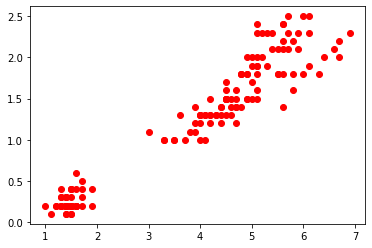

In [12]:
## use patplot lib to visualise the clusters
plt.scatter(irisd['petal length (cm)'],irisd['petal width (cm)'],color='red') ## visually wew can see two clusters

In [13]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)

In [14]:
y_predicted=km.fit_predict(inputs[['petal length (cm)','petal width (cm)']])

In [15]:
inputs['clusters']=y_predicted

In [16]:
inputs.clusters[50:100]

50    2
51    2
52    2
53    2
54    2
55    2
56    2
57    2
58    2
59    2
60    2
61    2
62    2
63    2
64    2
65    2
66    2
67    2
68    2
69    2
70    2
71    2
72    2
73    2
74    2
75    2
76    2
77    0
78    2
79    2
80    2
81    2
82    2
83    0
84    2
85    2
86    2
87    2
88    2
89    2
90    2
91    2
92    2
93    2
94    2
95    2
96    2
97    2
98    2
99    2
Name: clusters, dtype: int32

In [17]:
iris1=inputs[inputs.clusters==0]
iris2=inputs[inputs.clusters==1]

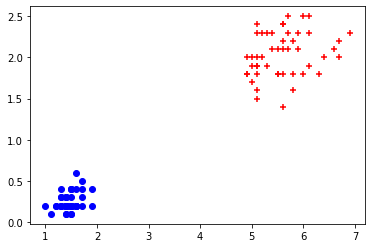

In [18]:
plt.scatter(iris1['petal length (cm)'],iris1['petal width (cm)'],marker='+',color='red')
plt.scatter(iris2['petal length (cm)'],iris2['petal width (cm)'],marker='o',color='blue')

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(inputs[['petal length (cm)']])
inputs['petal length (cm)']=scaler.transform(inputs[['petal length (cm)']])
scaler1=MinMaxScaler()
scaler1.fit(inputs[['petal width (cm)']])
inputs['petal width (cm)']=scaler.transform(inputs[['petal width (cm)']])

In [20]:
inputs.head()

,petal length (cm),petal width (cm),clusters
0,0.067797,-0.135593,1
1,0.067797,-0.135593,1
2,0.050847,-0.135593,1
3,0.084746,-0.135593,1
4,0.067797,-0.135593,1


In [21]:
y_predicted=km.fit_predict(inputs[['petal length (cm)','petal width (cm)']])

In [22]:
inputs['clusters']=y_predicted

In [23]:
iris1=inputs[inputs.clusters==0]
iris2=inputs[inputs.clusters==1]

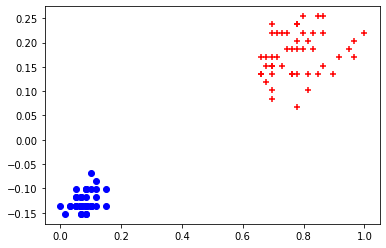

In [24]:
plt.scatter(iris1['petal length (cm)'],iris1['petal width (cm)'],marker='+',color='red')
plt.scatter(iris2['petal length (cm)'],iris2['petal width (cm)'],marker='o',color='blue')

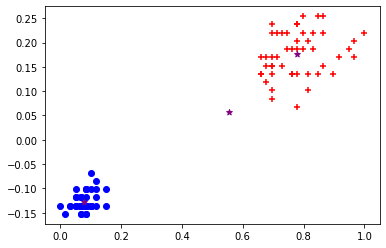

In [25]:
plt.scatter(iris1['petal length (cm)'],iris1['petal width (cm)'],marker='+',color='red')
plt.scatter(iris2['petal length (cm)'],iris2['petal width (cm)'],marker='o',color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')

In [27]:
##elbow method
k_range=range(1,11)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(inputs[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

C:\Users\ronal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


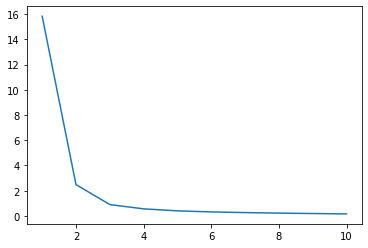

In [28]:
plt.plot(k_range,sse)